<a href="https://colab.research.google.com/github/ppelino/123/blob/main/Fuzzy_Exemplo_gorgetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy - exemplo das gorgetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


## Instalação e importação das bibliotecas

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a28d5852e33dd2c0cedc6358260e0d2deb32080dc3b1108c6d5921a6be2f73a4
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequente

In [3]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [5]:
qualidade

Antecedent: qualidade

In [6]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [8]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [9]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

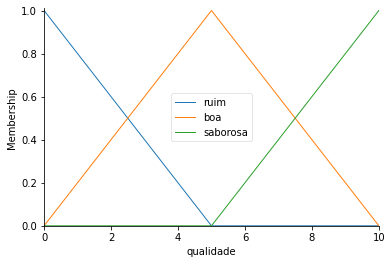

In [10]:
qualidade.view()

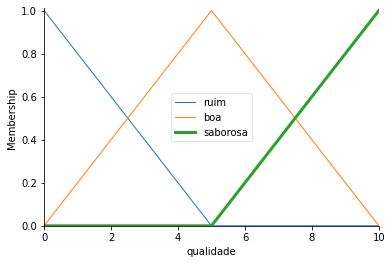

In [11]:
qualidade['saborosa'].view()

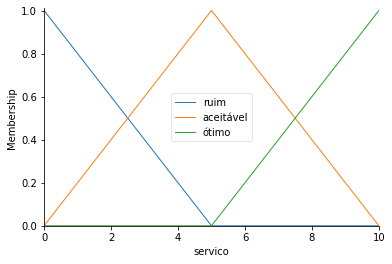

In [12]:
servico.view()

In [13]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [14]:
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 8])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [2, 10, 18])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [12, 20, 20])

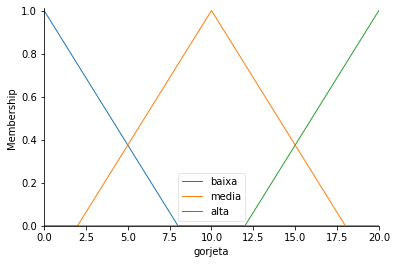

In [15]:
gorjeta.view()

In [16]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [17]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [18]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [19]:
sistema.input['qualidade'] = 10
sistema.input['servico'] = 10
sistema.compute()

17.333333333333332


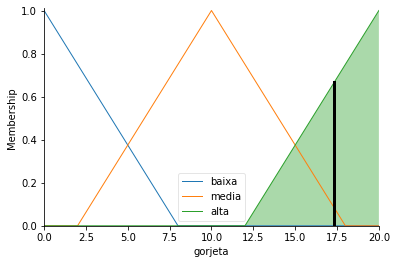

In [20]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)